# Data from Analise's Thesis

In [1]:
import os
os.chdir('..')

In [2]:
import pandas as pd
from src.plot_utils import PlotUtils
from src.analise_thesis.plotter import Plotter
import matplotlib.pyplot as plt
from pprint import pprint

### Set general figure parameters

In [3]:
home = os.path.expanduser("~")
figure_store_path = os.path.join(home, 'data/figs_sensors_actuators')
os.makedirs(figure_store_path, mode = 0o777, exist_ok = True)
fig_format = 'svg'
tick_fontsize = 14
is_title_and_labels: bool = True
aspect = 1 # both axes are of equal length (square plot)
PlotUtils.set_user_figure_dir(user_fig_directory=figure_store_path)

## Hard chip data

In [4]:
data_hard = [
    (896, 1, 'hard'),
    (764, 1, 'hard'),
    (608, 1, 'hard'),
    (512, 1, 'hard'),
    (764, 2, 'hard'),
    (608, 2, 'hard'),
    (512, 2, 'hard'),
    (384, 2, 'hard'),
    (288, 2, 'hard'),
    (996, 3, 'hard'),
    (800, 3, 'hard'),
    (764, 3, 'hard'),
    (764, 4, 'hard'),
    (512, 4, 'hard'),
    (384, 4, 'hard'),
    (192, 4, 'hard'),
    ]
data_hard = list(filter(lambda x: x != (512, 2, 'hard'), data_hard))
data_hard = list(filter(lambda x: x != (192, 4, 'hard'), data_hard))
plotter_hard = Plotter(data = data_hard, nrows = 1, ncols = 1,
                       xlabel = "Injection number", ylabel = 'Resistance (K$\Omega$)',
                       xlim = [0, 5], ylim = [0, 1e6], aspect=1.5, capsize = 10,
                       fig_format = fig_format, is_title_and_labels=True, fontsize=tick_fontsize)

In [5]:
plotter_hard.sort_tuples(data=data_hard, idx_to_sort_by=0)
pprint(data_hard)

[(288, 2, 'hard'),
 (384, 2, 'hard'),
 (384, 4, 'hard'),
 (512, 1, 'hard'),
 (512, 4, 'hard'),
 (608, 1, 'hard'),
 (608, 2, 'hard'),
 (764, 1, 'hard'),
 (764, 2, 'hard'),
 (764, 3, 'hard'),
 (764, 4, 'hard'),
 (800, 3, 'hard'),
 (896, 1, 'hard'),
 (996, 3, 'hard')]


### Create plots for each data tuple for all hard data

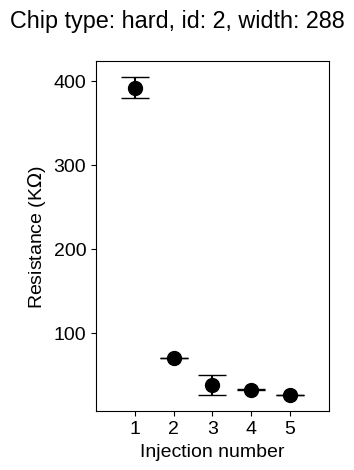

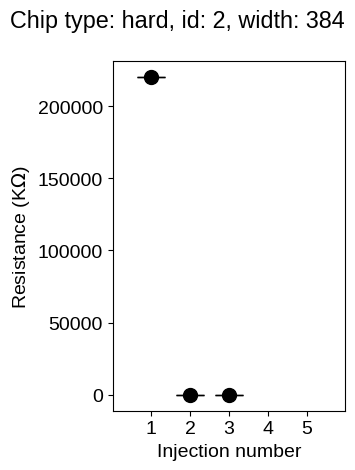

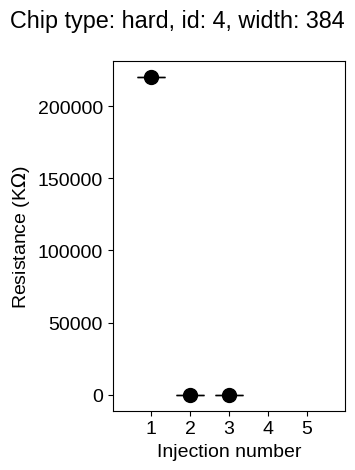

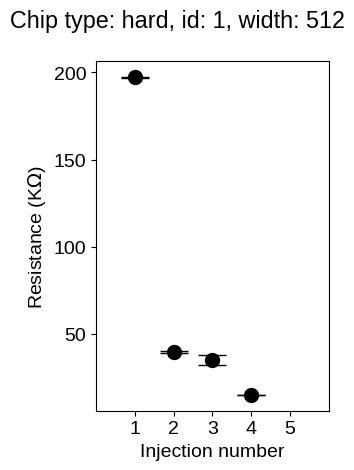

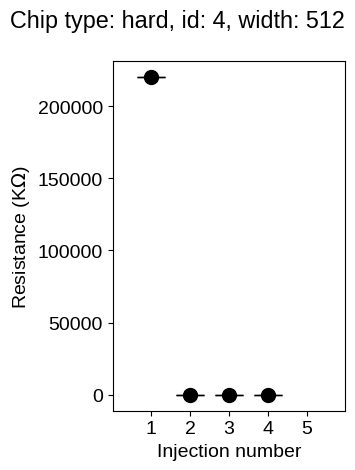

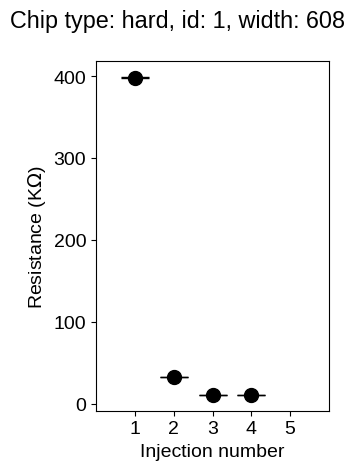

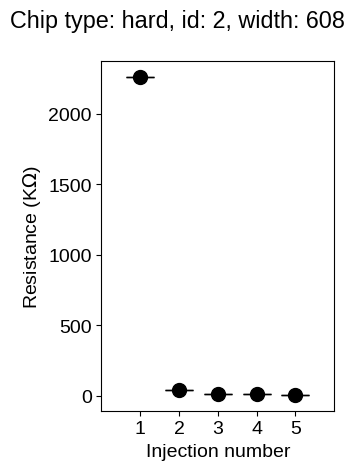

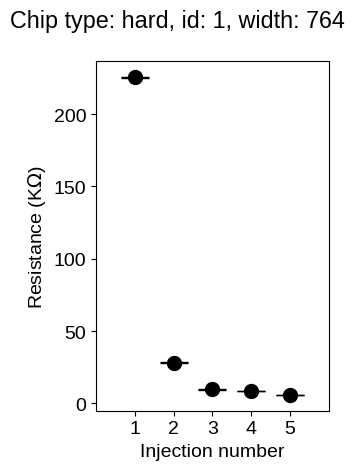

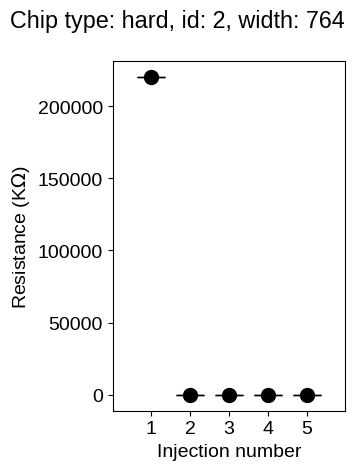

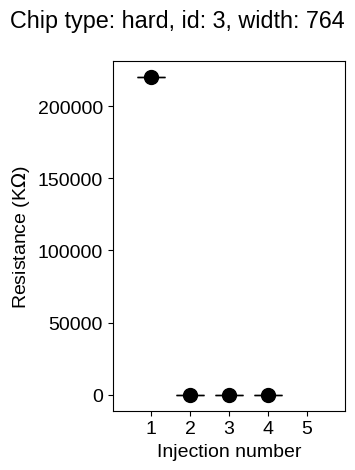

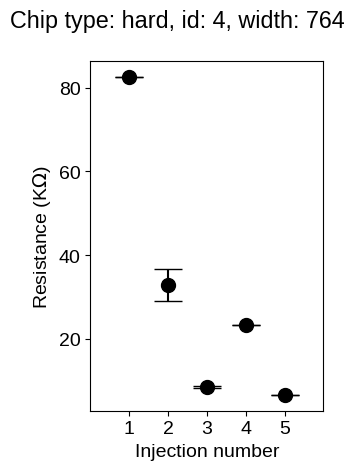

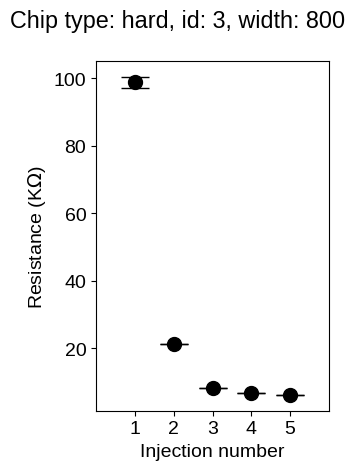

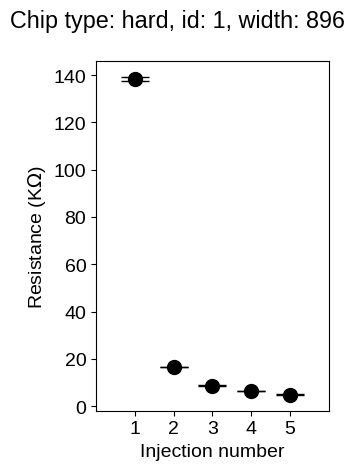

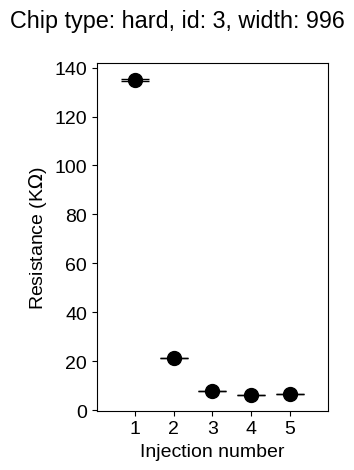

In [6]:
plotter_hard.run_individual_chips()

### Averaged and weighted data for hard chips

channel_width: 288
data: [(288, 2, 'hard')]
processing chip ID: 2
aggregate from channel_datum: Channel Data:
  width: 288
  chip_type: hard
  self.num_injections: 5
   Chip Name  Injection Number  Resistance (kΩ)  Standard Deviation (kΩ)
34     2-288                 1           391.80                  12.3600
35     2-288                 2            70.26                   0.2169
36     2-288                 3            38.02                  11.4100
37     2-288                 4            32.62                   0.2453
38     2-288                 5            26.44                   0.1032
xdata: [1, 2, 3, 4, 5]
ydata: [391.8, 70.26, 38.02, 32.62, 26.44]
yerr: [12.36, 0.2169, 11.41, 0.2453, 0.1032]

data type of restructured_data: <class 'list'>
'item: [(391.8, 12.36)]'
'item: [(70.26, 0.2169)]'
'item: [(38.02, 11.41)]'
'item: [(32.62, 0.2453)]'
'item: [(26.44, 0.1032)]'
stddevs: [12.36]
cls.weights: [0.006545804924539961]
weighted_ydata_: 391.8, weighted_yerr_: 152.769600000000

aggregate from channel_datum: Channel Data:
  width: 800
  chip_type: hard
  self.num_injections: 5
   Chip Name  Injection Number  Resistance (kΩ)  Standard Deviation (kΩ)
44     3-800                 1           98.740                 1.553000
45     3-800                 2           21.410                 0.030510
46     3-800                 3            8.336                 0.007538
47     3-800                 4            6.853                 0.046700
48     3-800                 5            6.271                 0.020600
xdata: [1, 2, 3, 4, 5]
ydata: [98.74, 21.41, 8.336, 6.853, 6.271]
yerr: [1.553, 0.03051, 0.007538, 0.0467, 0.0206]

data type of restructured_data: <class 'list'>
'item: [(98.74, 1.553)]'
'item: [(21.41, 0.03051)]'
'item: [(8.336, 0.007538)]'
'item: [(6.853, 0.0467)]'
'item: [(6.271, 0.0206)]'
stddevs: [1.553]
cls.weights: [0.4146265313712653]
weighted_ydata_: 98.74, weighted_yerr_: 19.195079999999997
stddevs: [0.03051]
cls.weights: [1074.275285835111]
weigh

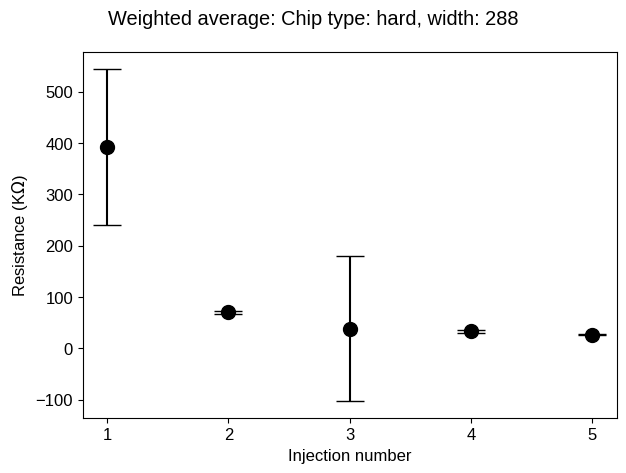

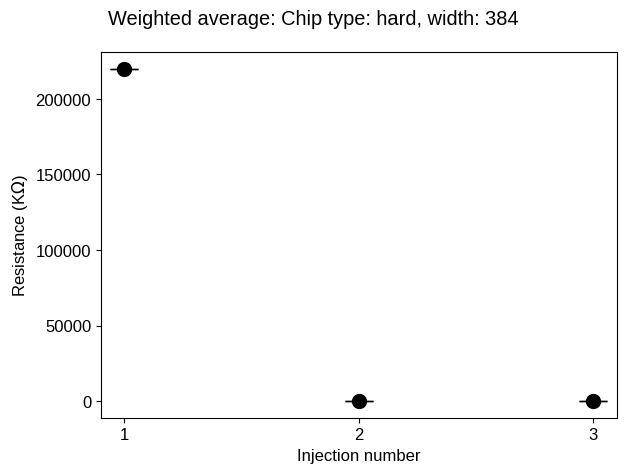

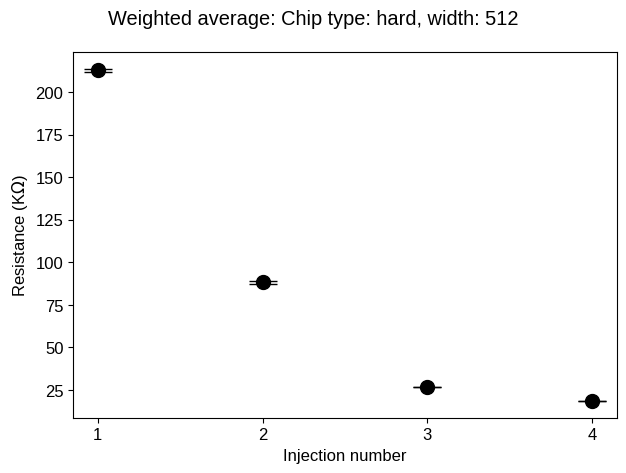

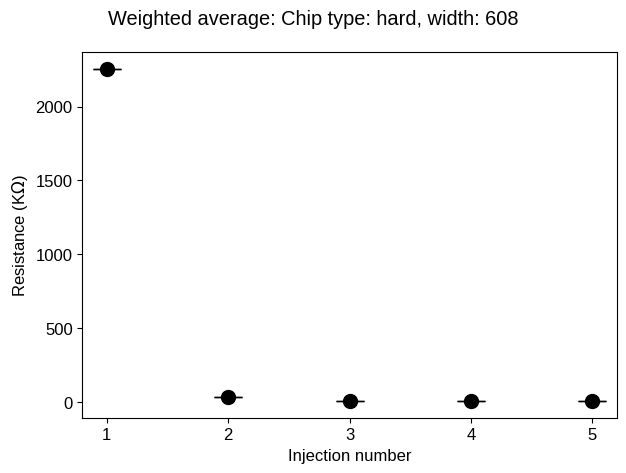

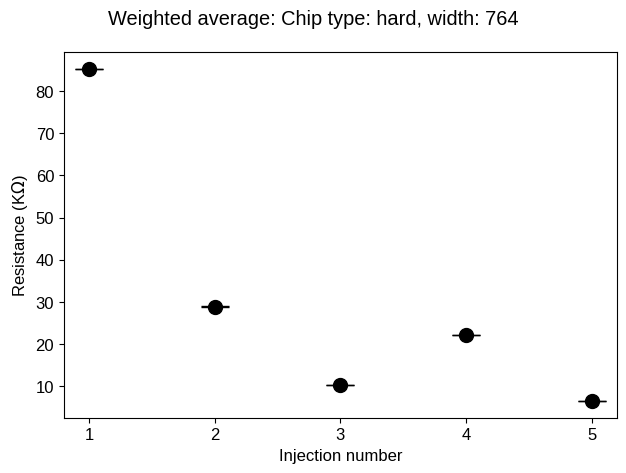

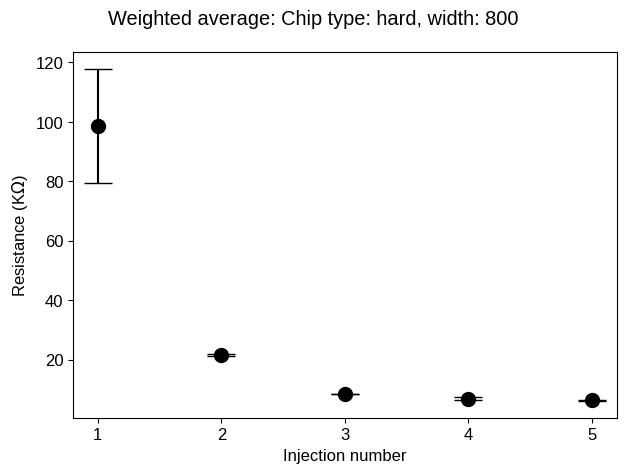

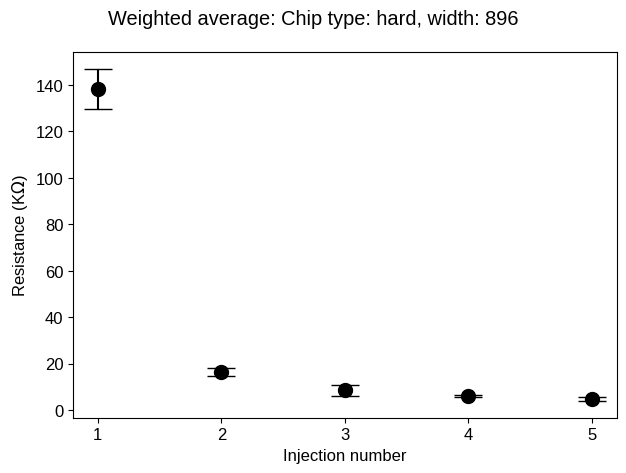

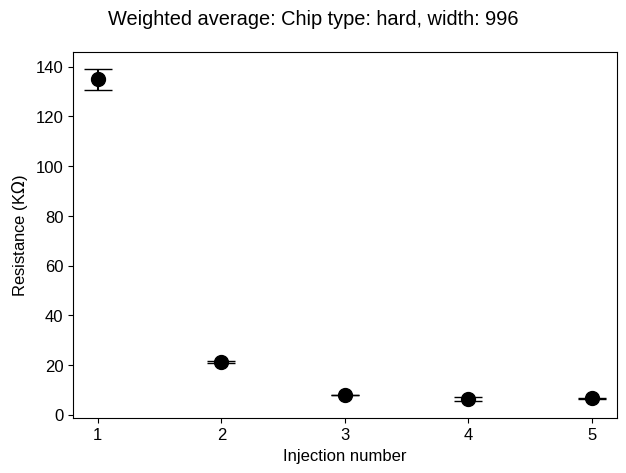

In [7]:
df = pd.DataFrame()
channel_widths = plotter_hard.get_channel_list()
for channel_width in channel_widths:
    print(f'channel_width: {channel_width}')
    data = plotter_hard.filter_by_width(width=channel_width)
    print(f'data: {data}')
    df_ = pd.DataFrame(plotter_hard.get_averaged_channel_data(data))
    df = pd.concat([df_, df])

### Print dataframe and write to disk as a CSV file

In [8]:
path = os.path.join(PlotUtils.glob_figpath, 'weighted_data_hard.csv')
df.to_csv(path)
df

,chip_width,chip_type,number_of_chips,x_data,number_of_injections,y_data,y_err
0,996,hard,1,1,5,134.900000,4.306224
1,996,hard,1,2,5,21.250000,0.533828
2,996,hard,1,3,5,7.928000,0.115517
3,996,hard,1,4,5,6.265000,0.807108
4,996,hard,1,5,5,6.514000,0.184658
0,896,hard,1,1,5,138.400000,8.613684
1,896,hard,1,2,5,16.590000,1.688376
2,896,hard,1,3,5,8.512000,2.491776
3,896,hard,1,4,5,6.235000,0.431488
4,896,hard,1,5,5,4.833000,0.899808


### Filter dataframe for the resistance at the last injection

In [9]:
df_last_injection = df.loc[df.x_data == df.number_of_injections]
df_last_injection

,chip_width,chip_type,number_of_chips,x_data,number_of_injections,y_data,y_err
4,996,hard,1,5,5,6.514000,0.184658
4,896,hard,1,5,5,4.833000,0.899808
4,800,hard,1,5,5,6.271000,0.254616
4,764,hard,4,5,5,6.576132,0.064488
4,608,hard,2,5,5,8.371000,0.369440
3,512,hard,2,4,4,18.578099,0.163645
2,384,hard,2,3,3,24.374414,0.031240
4,288,hard,1,5,5,26.440000,1.275552


### Summary plots: resistance at each channel after last injection
The number of the last injection is variable, shown in the above tables in column `number_of_injections`.

[1, 1, 1, 4, 2, 2, 2, 1]
[996, 896, 800, 764, 608, 512, 384, 288]


/home/mkrause/dev/artificial-muscle/src/plot_utils.py:112: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(ylim)


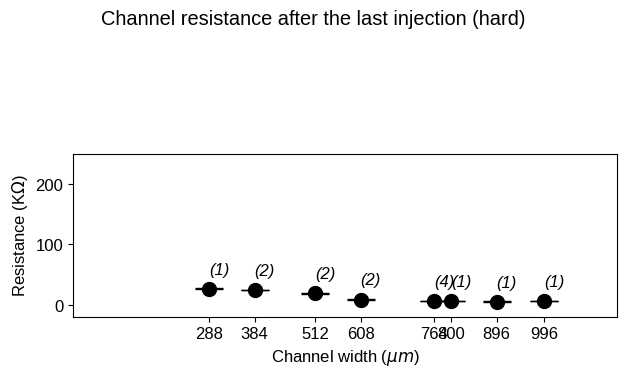

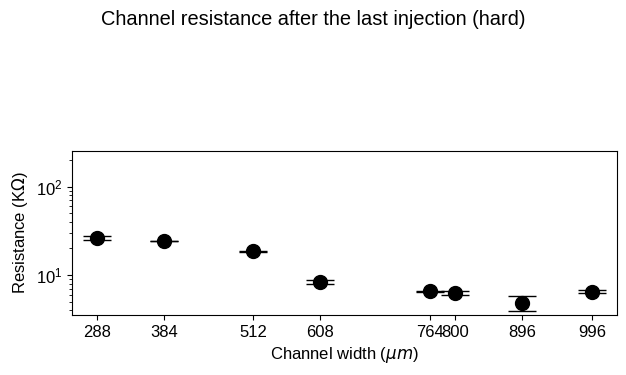

In [10]:
# print(df_last_injection.chip_width.to_list())
title = 'Channel resistance after the last injection (hard)'
xlabel = 'Channel width ($\mu m$)'
aspect = 0.3
xlim = [0, 1150]
ylim = [-20, 250]

print(df_last_injection.number_of_chips.to_list())
print(df_last_injection.chip_width.to_list())

# with linear y-scale
figname = os.path.join(PlotUtils.glob_figpath, f'resistance_at_last_injection_hard_linear.{fig_format}')
PlotUtils.plot_scatter(df_last_injection.chip_width, df_last_injection.y_data, yerr=df_last_injection.y_err,
                       nrows=plotter_hard.nrows, ncols=plotter_hard.ncols, aspect = aspect,
                       xlabel=xlabel, ylabel=plotter_hard.ylabel, xlim=xlim, ylim=ylim, capsize=plotter_hard.capsize,
                       xticks=df_last_injection.chip_width.to_list(), title=title, figname=figname,
                       fig_format=fig_format, annotate=df_last_injection.number_of_chips.to_list())
# with logarithmic y-scale
figname = os.path.join(PlotUtils.glob_figpath, f'resistance_at_last_injection_hard_logarithmic.{fig_format}')
PlotUtils.plot_scatter(df_last_injection.chip_width, df_last_injection.y_data, yerr=df_last_injection.y_err,
                       nrows=plotter_hard.nrows, ncols=plotter_hard.ncols, aspect = aspect,
                       xlabel=xlabel, ylabel=plotter_hard.ylabel, ylim=ylim, capsize=plotter_hard.capsize,
                       xticks=df_last_injection.chip_width.to_list(), title=title, figname=figname,
                       fig_format=fig_format, yscale='log')

## Soft chip data

In [11]:
data_soft = [
    (720, 1, 'soft'),
    (720, 3, 'soft'),
    (720, 5, 'soft'),
    (720, 6, 'soft'),
    (960, 1, 'soft'),
    (960, 5, 'soft'),
    (960, 6, 'soft'),
    (960, 7, 'soft'),
    (840, 1, 'soft'),
    (840, 5, 'soft'),
    (840, 6, 'soft'),
    (1080, 1, 'soft'),
    (1080, 2, 'soft'),
    (1080, 3, 'soft'),
    (1080, 5, 'soft'),
    (1080, 6, 'soft'),
    (1080, 7, 'soft'),
    (600, 2, 'soft'),
    (600, 3, 'soft'),
    (600, 5, 'soft'),
    (480, 2, 'soft'),
]
plotter_soft = Plotter(data = data_soft, nrows = 1, ncols = 1, 
                       xlabel = "Injection number", ylabel = 'Resistance (K$\Omega$)',
                       xlim = [0, 5], ylim = [0, 1e6], aspect=1.5, capsize = 10,
                       fig_format = fig_format, is_title_and_labels=True, fontsize=tick_fontsize)

### Create plots for each data tuple

/home/mkrause/dev/artificial-muscle/src/plot_utils.py:69: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(subplot_config['nrows'], subplot_config['ncols'])


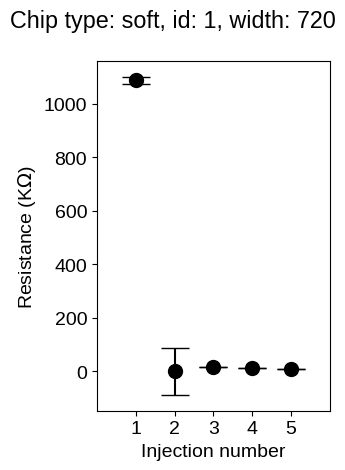

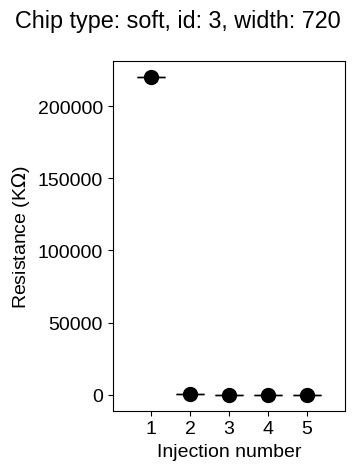

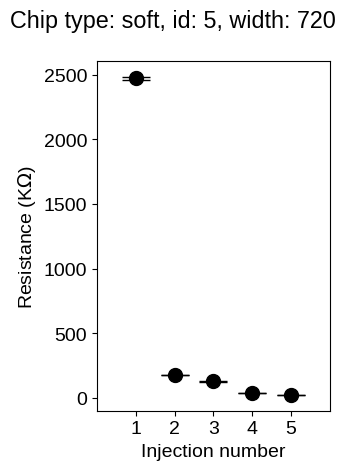

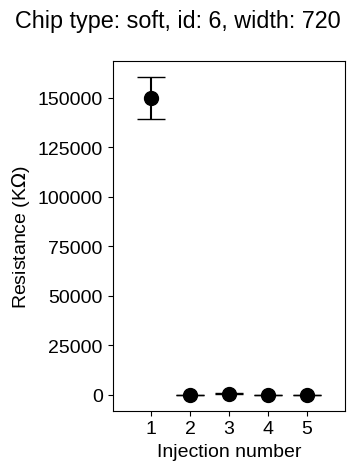

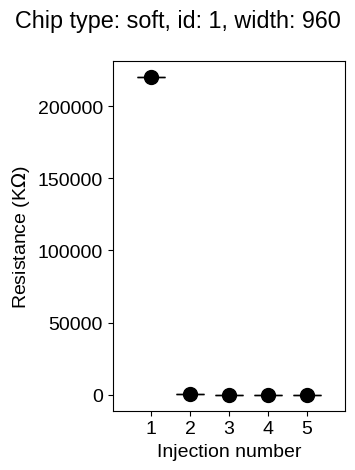

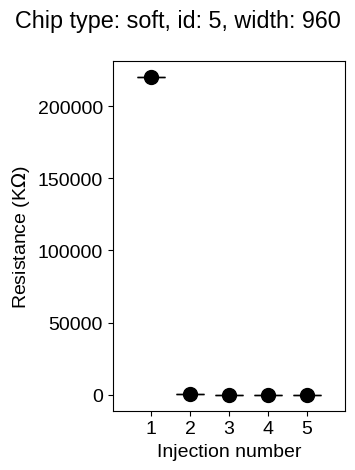

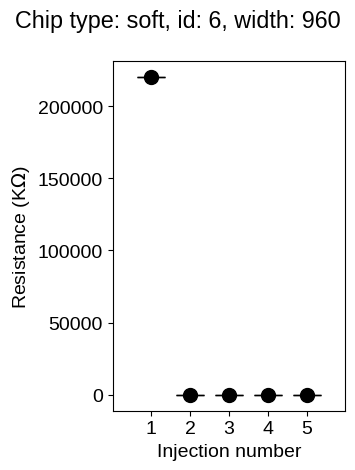

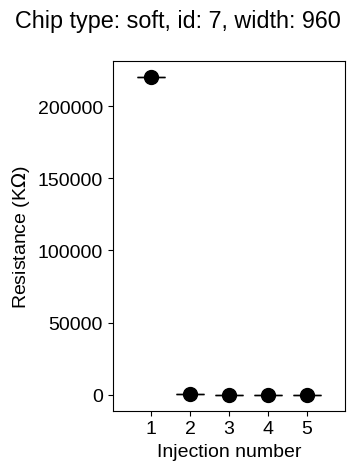

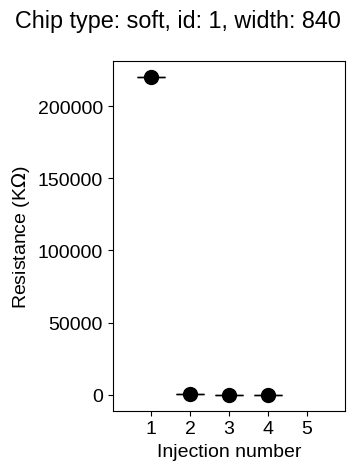

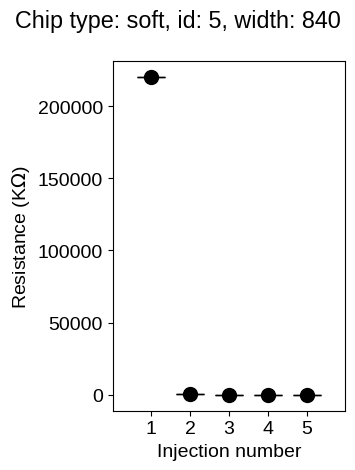

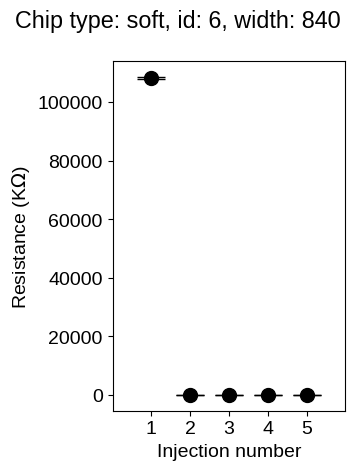

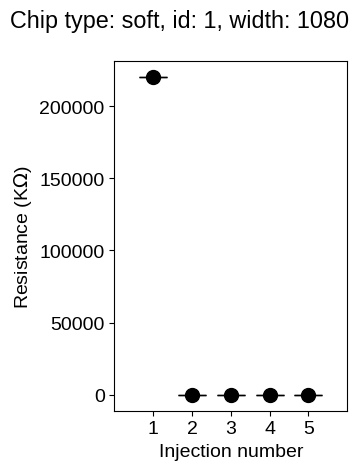

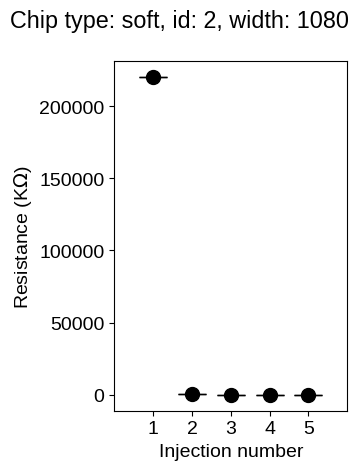

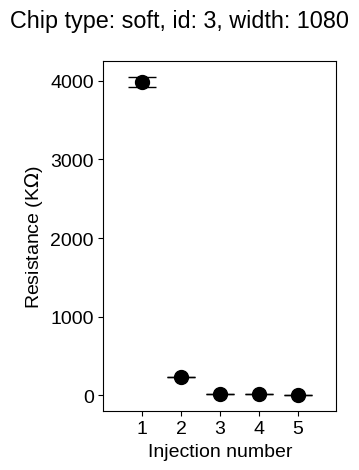

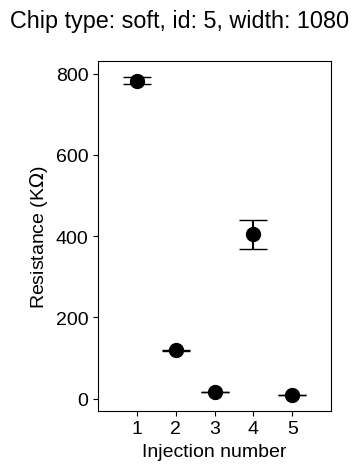

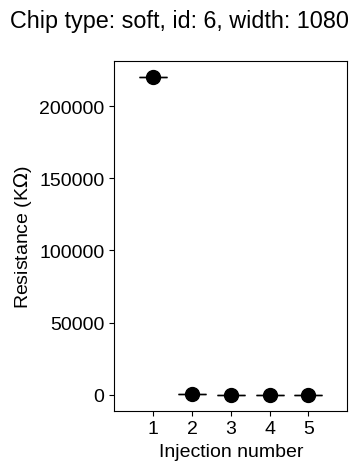

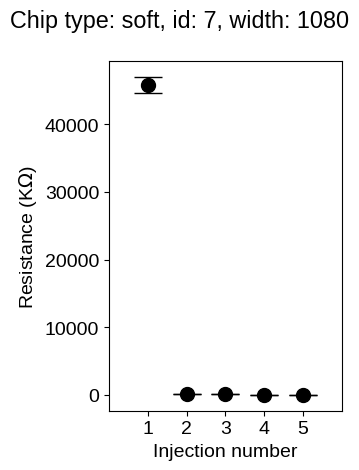

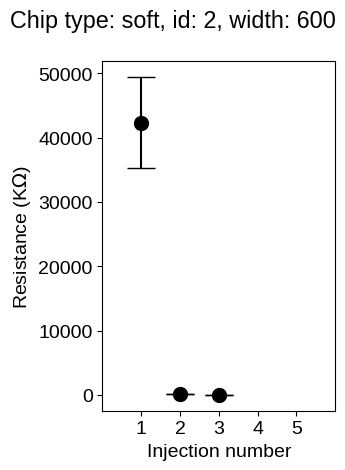

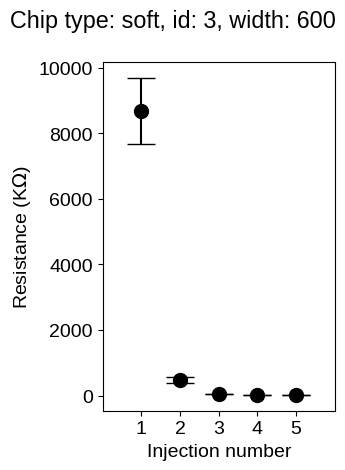

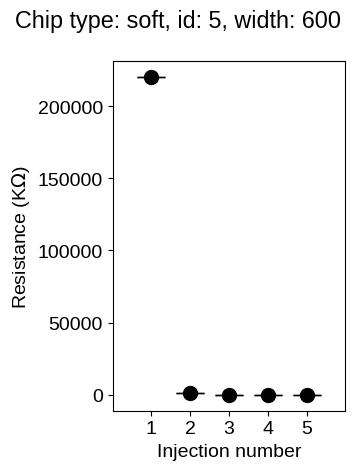

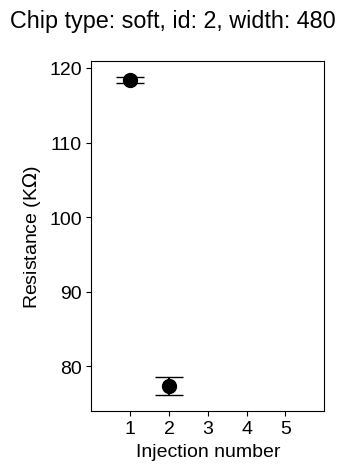

In [12]:
plotter_soft.run_individual_chips()

### Averaged and weighted data for soft chips

processing chip ID: 2
aggregate from channel_datum: Channel Data:
  width: 480
  chip_type: soft
  self.num_injections: 2
   Chip Name  Injection Number  Resistance (kΩ)  Standard Deviation (kΩ)
27     2-480                 1           118.40                   0.3546
28     2-480                 2            77.34                   1.1660
xdata: [1, 2]
ydata: [118.4, 77.34]
yerr: [0.3546, 1.166]

data type of restructured_data: <class 'list'>
'item: [(118.4, 0.3546)]'
'item: [(77.34, 1.166)]'
stddevs: [0.3546]
cls.weights: [7.952845353104742]
weighted_ydata_: 118.4, weighted_yerr_: 4.382856
stddevs: [1.166]
cls.weights: [0.7355342479456529]
weighted_ydata_: 77.34, weighted_yerr_: 14.41176
xdata: [1, 2]; max_number_injections: 2
printing: width_480_type_soft_weighted_data.svg
processing chip ID: 2
processing chip ID: 3
processing chip ID: 5
aggregate from channel_datum: Channel Data:
  width: 600
  chip_type: soft
  self.num_injections: 3
   Chip Name  Injection Number  Resistance (kΩ) 

processing chip ID: 7
aggregate from channel_datum: Channel Data:
  width: 960
  chip_type: soft
  self.num_injections: 5
  Chip Name  Injection Number  Resistance (kΩ)  Standard Deviation (kΩ)
5     1-960                 1        220000.00                   0.0000
6     1-960                 2           744.30                   5.7590
7     1-960                 3           171.90                   0.9102
8     1-960                 4            64.49                   3.5680
9     1-960                 5            20.26                   0.3056
xdata: [1, 2, 3, 4, 5]
ydata: [220000.0, 744.3, 171.9, 64.49, 20.26]
yerr: [0.0, 5.759, 0.9102, 3.568, 0.3056]

aggregate from channel_datum: Channel Data:
  width: 960
  chip_type: soft
  self.num_injections: 5
   Chip Name  Injection Number  Resistance (kΩ)  Standard Deviation (kΩ)
50     5-960                 1        220000.00                 0.000000
51     5-960                 2           447.60                 0.836100
52     5-960   

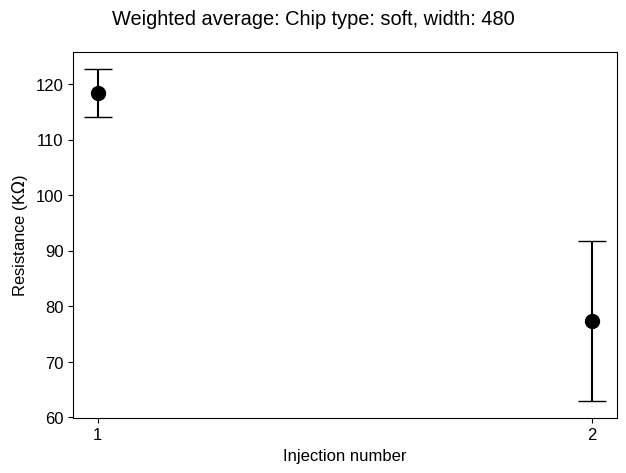

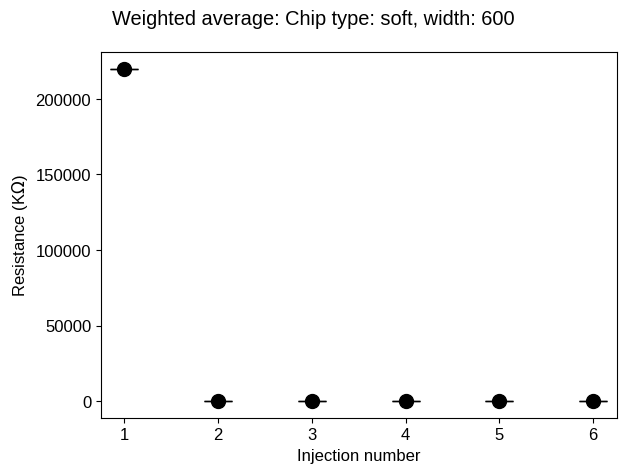

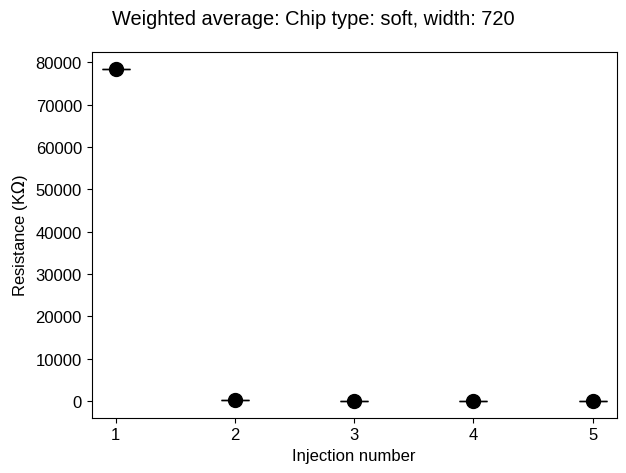

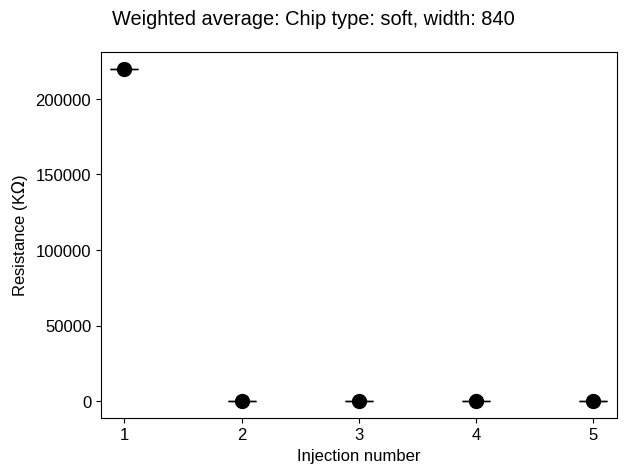

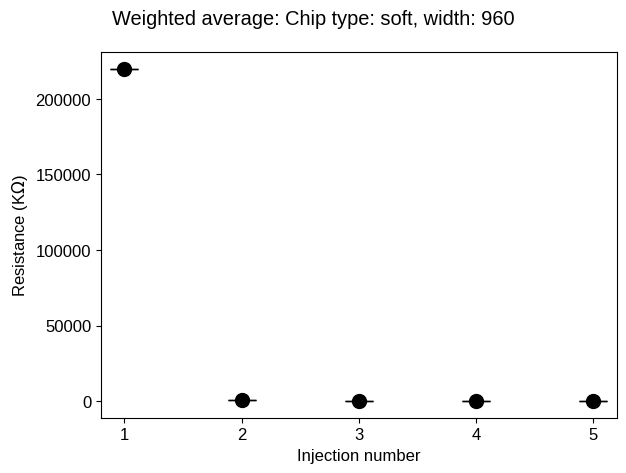

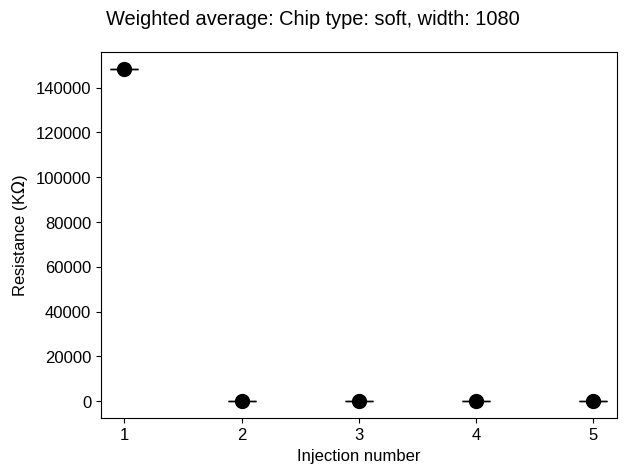

In [13]:
df = pd.DataFrame()
channel_widths = plotter_soft.get_channel_list()
for channel_width in channel_widths:
    data = plotter_soft.filter_by_width(width=channel_width)
    df_ = pd.DataFrame(plotter_soft.get_averaged_channel_data(data))
    df = pd.concat([df_, df])

In [14]:
path = os.path.join(PlotUtils.glob_figpath, 'weighted_data_soft.csv')
df.to_csv(path)
df

,chip_width,chip_type,number_of_chips,x_data,number_of_injections,y_data,y_err
0,1080,soft,6,1,5,148418.663586,27.743434
1,1080,soft,6,2,5,161.129226,1.828261
2,1080,soft,6,3,5,16.771089,0.004646
3,1080,soft,6,4,5,18.827472,0.089706
4,1080,soft,6,5,5,12.066851,0.041695
0,960,soft,4,1,5,220000.000000,30.900000
1,960,soft,4,2,5,448.752747,1.412449
2,960,soft,4,3,5,96.454096,0.050371
3,960,soft,4,4,5,40.620996,0.011539
4,960,soft,4,5,5,20.601813,0.002699


### Filter dataframe for last injection

In [15]:
df_last_injection = df.loc[df.x_data == df.number_of_injections]
df_last_injection

,chip_width,chip_type,number_of_chips,x_data,number_of_injections,y_data,y_err
4,1080,soft,6,5,5,12.066851,0.041695
4,960,soft,4,5,5,20.601813,0.002699
4,840,soft,3,5,5,24.857453,1.590096
4,720,soft,4,5,5,11.429361,0.235525
5,600,soft,3,6,6,28.380000,28.465080
1,480,soft,1,2,2,77.340000,14.411760


### Summary plots: resistance at each channel after last injection
The number of the last injection is variable, shown in the above tables in column `number_of_injections`.

[1080, 960, 840, 720, 600, 480]


/home/mkrause/dev/artificial-muscle/src/plot_utils.py:112: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(ylim)


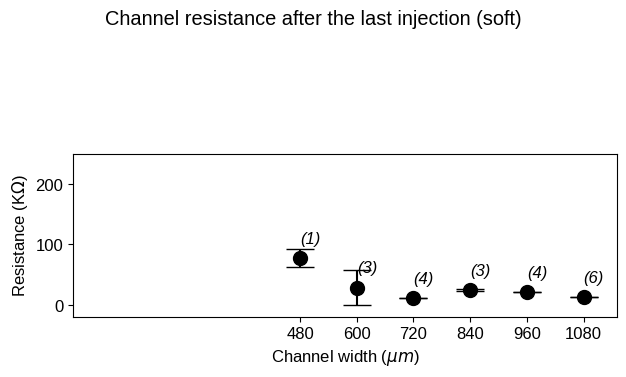

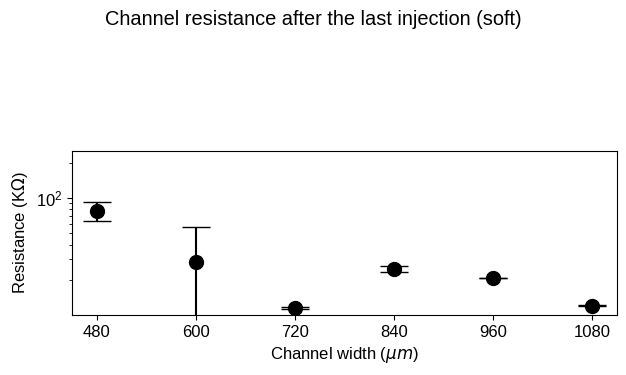

In [16]:
print(df_last_injection.chip_width.to_list())
title = 'Channel resistance after the last injection (soft)'
xlabel = 'Channel width ($\mu m$)'

# with linear y-scale
figname = os.path.join(PlotUtils.glob_figpath, f'resistance_at_last_injection_soft_linear.{fig_format}')
PlotUtils.plot_scatter(df_last_injection.chip_width, df_last_injection.y_data, yerr=df_last_injection.y_err, 
                       nrows=plotter_soft.nrows, ncols=plotter_soft.ncols, aspect = aspect,
                       xlabel=xlabel, ylabel=plotter_soft.ylabel, xlim=xlim, ylim=ylim, capsize=plotter_soft.capsize,
                       xticks=df_last_injection.chip_width.to_list(), title=title, figname=figname,
                       fig_format=fig_format, annotate=df_last_injection.number_of_chips.to_list())

# with logrithmic y-scale
figname = os.path.join(PlotUtils.glob_figpath, f'resistance_at_last_injection_soft_logarithmic.{fig_format}')
PlotUtils.plot_scatter(df_last_injection.chip_width, df_last_injection.y_data, yerr=df_last_injection.y_err, 
                       nrows=plotter_soft.nrows, ncols=plotter_soft.ncols, aspect = aspect,
                       xlabel=xlabel, ylabel=plotter_soft.ylabel, capsize=plotter_soft.capsize,
                       xticks=df_last_injection.chip_width.to_list(), title=title, figname=figname,
                       fig_format=fig_format, ylim=ylim, yscale='log')

In [17]:
pprint(data_hard)
df_hard = pd.DataFrame()
from src.analise_thesis.channel_data import ChannelData
for datum in data_hard:
    channel_data = ChannelData(channel_width=datum[0], chip_id=datum[1], chip_type=datum[2])
    xdata, ydata, yerr = channel_data.get_data()
    df = pd.DataFrame({'width': datum[0], 'chip_id': datum[1], 'chip_type': datum[2], 'xdata': xdata, 'ydata': ydata, 'yerr': yerr})
    df_hard = pd.concat([df_hard, df])
df_hard

[(288, 2, 'hard'),
 (384, 2, 'hard'),
 (384, 4, 'hard'),
 (512, 1, 'hard'),
 (512, 4, 'hard'),
 (608, 1, 'hard'),
 (608, 2, 'hard'),
 (764, 1, 'hard'),
 (764, 2, 'hard'),
 (764, 3, 'hard'),
 (764, 4, 'hard'),
 (800, 3, 'hard'),
 (896, 1, 'hard'),
 (996, 3, 'hard')]


,width,chip_id,chip_type,xdata,ydata,yerr
0,288,2,hard,1,391.800,12.360000
1,288,2,hard,2,70.260,0.216900
2,288,2,hard,3,38.020,11.410000
3,288,2,hard,4,32.620,0.245300
4,288,2,hard,5,26.440,0.103200
...,...,...,...,...,...,...
0,996,3,hard,1,134.900,0.348400
1,996,3,hard,2,21.250,0.043190
2,996,3,hard,3,7.928,0.009346
3,996,3,hard,4,6.265,0.065300
